In [88]:
from ipywidgets import interact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [96]:
def select(n_member:int, n_reserved:int, verbose=False) -> bool:
    """
    集団人数と観察人数から、最適な人を選べるかどうかを判定する

    Parameters
    ----------
    n_member : int
        集団人数
    n_reserved : int
        観察人数

    Returns
    -------
    bool
        最適な人を選べるかどうか
    """
    applicats = np.random.permutation(n_member)
    candidate = applicats[:n_reserved]
    best_of_group = np.max(applicats)
    best_of_candidate = np.max(candidate)
    log_df = pd.DataFrame({
        '集団': [applicats],
        '観測した集団': [candidate], 
        '最適な人': [best_of_group],
        '観測した集団の中で最も優秀な人': [best_of_candidate],
        '最適な人が観測した集団にいるか': [best_of_group in candidate],
    })
    if (verbose):
        display(log_df)

    if (np.max(applicats) in candidate):
        return False
    
    selected = np.max(candidate)
    for i in range(n_reserved, n_member):
        if (applicats[i] == best_of_group):
            return True
        if (applicats[i] > selected):
            return False

    return False    

In [97]:
@interact(n_member=(1, 100), n_reserved=(1, 10))
def select_interactive(n_member:int, n_reserved:int):
    """
    インタラクティブに表示するためのラッパー関数
    """
    is_success = select(n_member, n_reserved, verbose=True)
    if is_success:
        print('最適な人を選べました！')
    else:
        print('最適な人を選べませんでした...')

interactive(children=(IntSlider(value=50, description='n_member', min=1), IntSlider(value=5, description='n_re…

In [103]:

def simulate(n_member:int, n_trial:int) -> float:
    r_mean_prob = np.zeros(n_member)
    for i in range(1,n_member):
        for _ in range(n_trial):
            r_mean_prob[i] += select(n_member, i)

        r_mean_prob[i] /= n_trial
    
    # seabornで散布図を描画
    sns.scatterplot(x=range(n_member), y=r_mean_prob)
    plt.xlabel('観測人数')
    plt.ylabel('最適な人を選べる確率')
    plt.grid()
    plt.title(f'集団人数: {n_member}, 試行回数: {n_trial}')
    # 矢印で最大値を表示
    plt.annotate(f'最大値: {np.max(r_mean_prob)}', xy=(np.argmax(r_mean_prob), np.max(r_mean_prob))
                    , xytext=(np.argmax(r_mean_prob), np.max(r_mean_prob)+0.1), arrowprops=dict(facecolor='black', shrink=0.05))

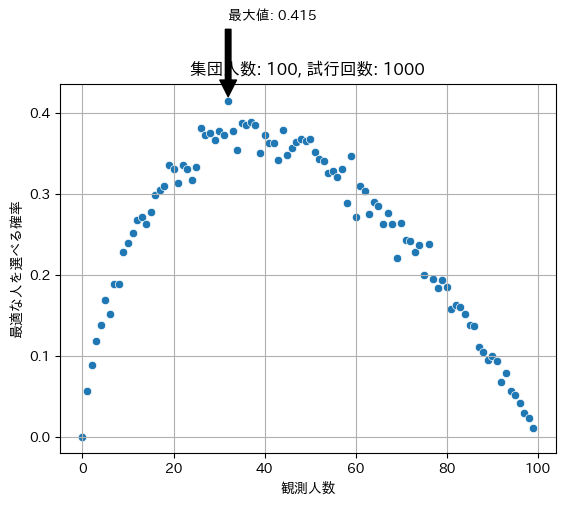

In [104]:
simulate(100, 1000)